In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import os
import graphviz
from torchview import draw_graph
from network import UFNONet, InversionNet, FNONet_Small, UNet

In [15]:
velocity = np.load('../dataset/CurveVel_A/model/model1.npy')
data = np.load('../dataset/CurveVel_A/data/data1.npy')

In [3]:
print('Velocity map size:', velocity.shape)
print('Seismic data size:', data.shape)

Velocity map size: (500, 1, 70, 70)
Seismic data size: (500, 5, 1000, 70)


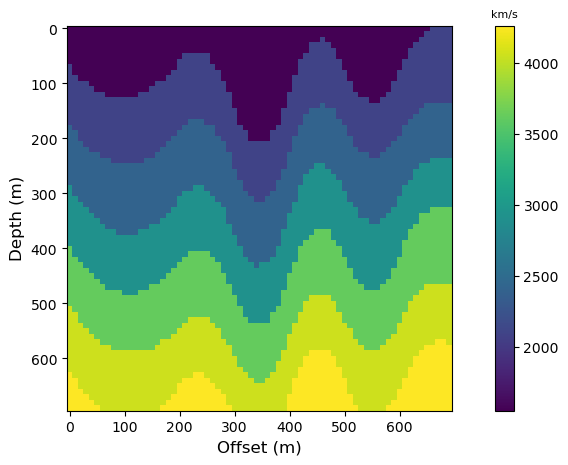

In [4]:
sample=14


fig, ax = plt.subplots(1, 1, figsize=(11, 5))
img=ax.imshow(velocity[sample,0,:,:])
ax.set_xticks(range(0, 70, 10))
ax.set_xticklabels(range(0, 700, 100))
ax.set_yticks(range(0, 70, 10))
ax.set_yticklabels(range(0, 700, 100))
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Offset (m)', fontsize=12)
clb=plt.colorbar(img, ax=ax)
clb.ax.set_title('km/s',fontsize=8)
plt.show()

In [8]:
if torch.cuda.is_available():
    print("GPU está disponível")
else:
    print("GPU não está disponível")

GPU está disponível


Seismic data size: (500, 5, 1000, 70)


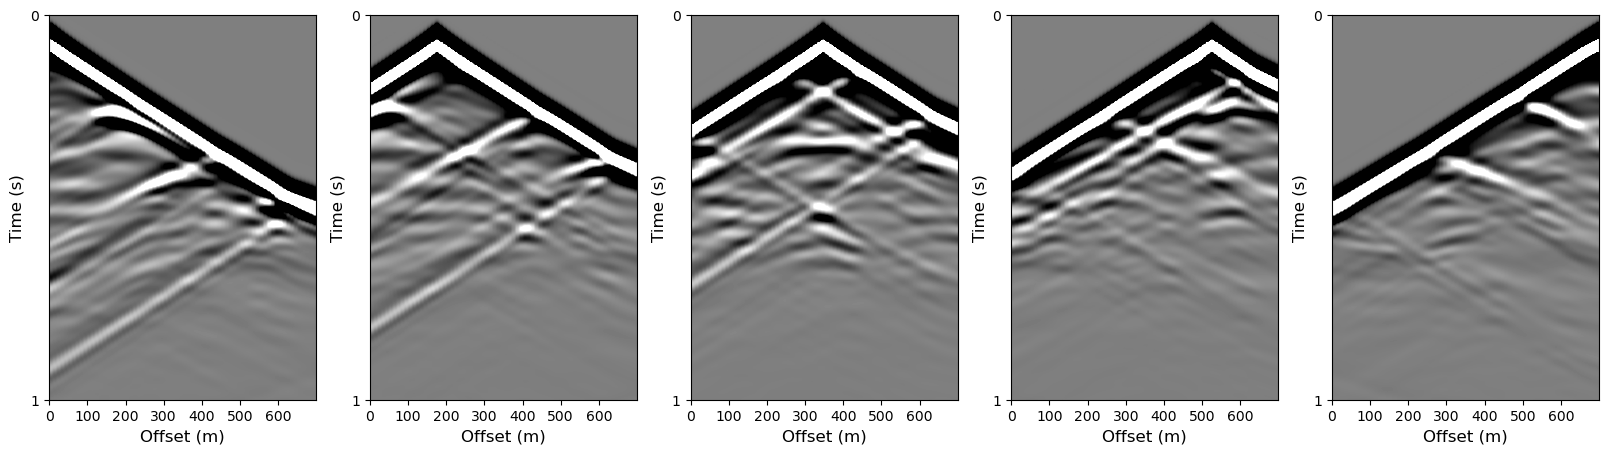

In [9]:
print('Seismic data size:', data.shape)

fig,ax=plt.subplots(1,5,figsize=(20,5))
ax[0].imshow(data[sample,0,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[1].imshow(data[sample,1,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[2].imshow(data[sample,2,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[3].imshow(data[sample,3,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[4].imshow(data[sample,4,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
for axis in ax:
   axis.set_xticks(range(0, 70, 10))
   axis.set_xticklabels(range(0, 700, 100))
   axis.set_yticks(range(0, 2000, 1000))
   axis.set_yticklabels(range(0, 2,1))
   axis.set_ylabel('Time (s)', fontsize=12)
   axis.set_xlabel('Offset (m)', fontsize=12)
plt.show()

In [20]:
os.listdir('../dataset/model')

['model1.npy', 'model2.npy', 'model3.npy', 'model4.npy', 'model5.npy']

In [10]:
torch.cuda.empty_cache()

In [13]:
# Mostra a memória total, usada e livre
print(f'Total memory: {torch.cuda.get_device_properties(0).total_memory}')
print(f'Cached memory: {torch.cuda.memory_reserved(0)}')
print(f'Allocated memory: {torch.cuda.memory_allocated(0)}')
print(f'Free memory: {torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_allocated(0)}')

Total memory: 12884246528
Cached memory: 0
Allocated memory: 0
Free memory: 12884246528


In [15]:
!python ..\OpenFWI-main\train.py -ds curvevel-a -n test -m InversionNet -g1v 1 -g2v 0 -o 'invnet_models' --tensorboard -t curvevel_test_train.txt -v curvevel_test_val.txt  --workers 1 --lr 0.0001 -b 16 -eb 1 -nb 3

Namespace(device='cuda', dataset='curvevel-a', file_size=None, anno_path='split_files', train_anno='split_files\\curvevel_test_train.txt', val_anno='split_files\\curvevel_test_val.txt', output_path="'invnet_models'\\test\\", log_path='Invnet_models\\test\\', save_name='test', suffix=None, model='InversionNet', up_mode=None, sample_spatial=1.0, sample_temporal=1, batch_size=16, lr=0.0001, lr_milestones=[], momentum=0.9, weight_decay=0.0001, lr_gamma=0.1, lr_warmup_epochs=0, epoch_block=1, num_block=3, workers=1, k=1, print_freq=50, resume=None, start_epoch=0, lambda_g1v=1.0, lambda_g2v=0.0, sync_bn=False, world_size=1, dist_url='env://', tensorboard=True, epochs=3)
torch version:  2.3.0
torchvision version:  0.18.0
Not using distributed mode
Loading data
Loading training data
../dataset/model/model1.npy
../dataset/model/model2.npy
../dataset/model/model3.npy
../dataset/model/model4.npy
Loading validation data
../dataset/model/model5.npy
Creating data loaders
Creating model
Start trainin

In [9]:
invnet = InversionNet()
fno_small = FNONet_Small()

In [10]:
graphviz.set_jupyter_format('jpeg')

'jpeg'

In [11]:
invnet_graph = draw_graph(invnet, input_size=(16,5,1000,70), device='meta', expand_nested=True)
fno_s_graph = draw_graph(fno_small, input_size=(16,5,1000,70), device='meta', expand_nested=True)

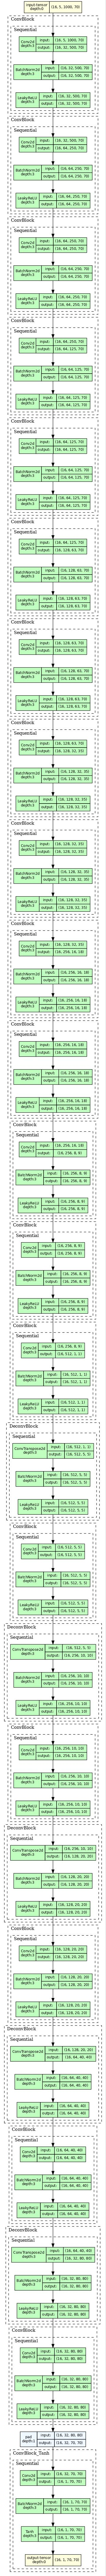

In [12]:
invnet_graph.visual_graph

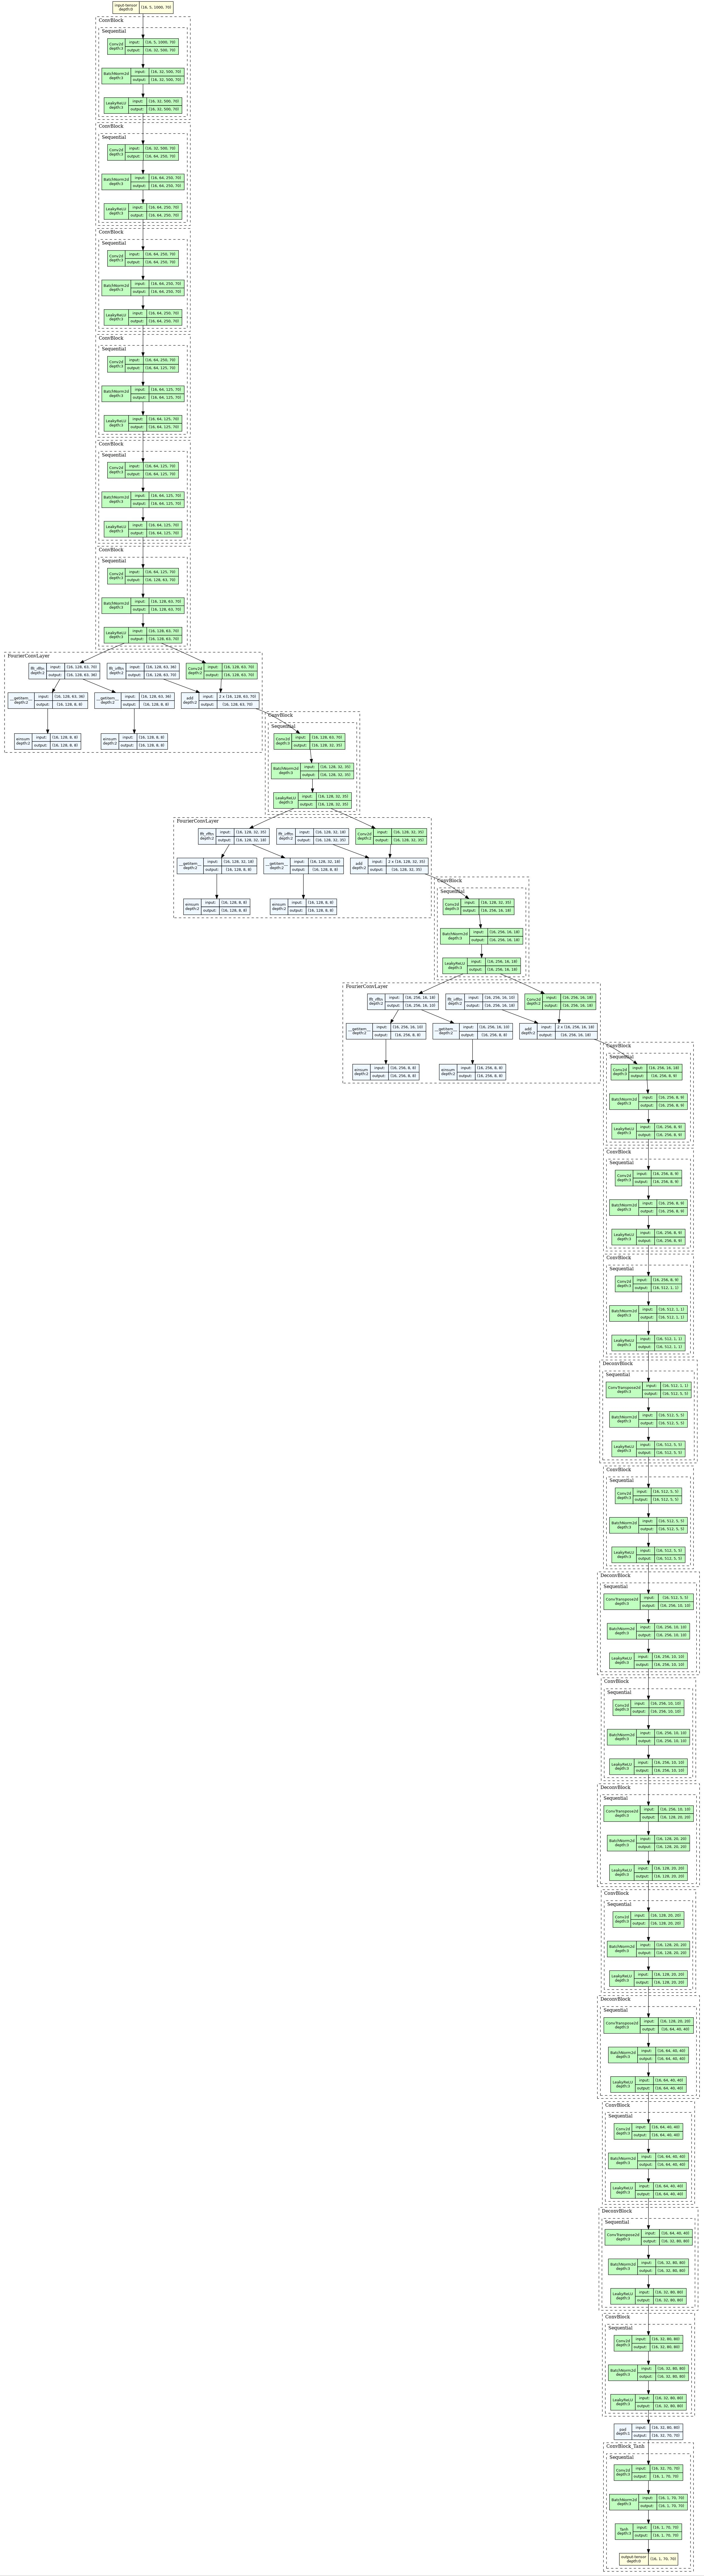

In [13]:
fno_s_graph.visual_graph

In [6]:
unet = UNet(5,1)
unet_graph = draw_graph(unet, input_size=(16,5,70,70), device='meta', expand_nested=True)

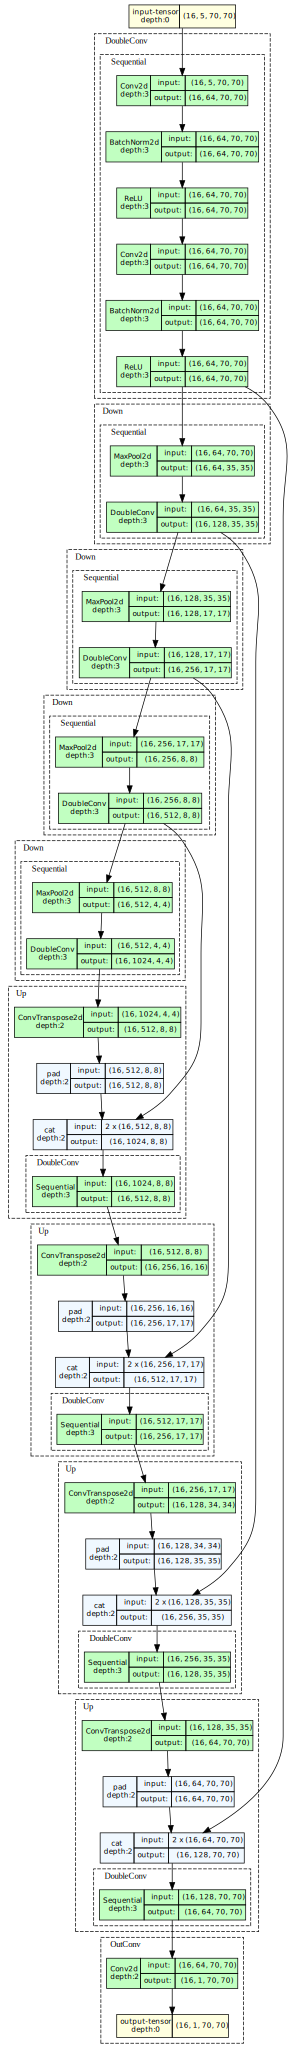

In [7]:
unet_graph.visual_graph